The below code imports several Python libraries that are commonly used in data science and machine learning applications, including Pandas, NumPy, Google Colab, Statsmodels, Scikit-learn, and Matplotlib.

The Pandas library is used for data manipulation and analysis, and NumPy is used for numerical operations.

The train_test_split function is used to split the data into training and testing datasets for model evaluation, and accuracy_score, confusion_matrix, roc_curve and classification_report functions are used to evaluate the performance of classification models.

Finally, the code imports DecisionTreeClassifier, RandomForestClassifier, BaggingClassifier from Scikit-learn, which is a popular algorithm used in decision tree classification models.

Seaborn is a popular data visualization library built on top of Matplotlib that provides a higher-level interface for creating attractive and informative statistical graphics. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The code reads a CSV file called "Flowdata1.csv" using the Pandas library and assigns the resulting DataFrame object to a variable called csv1.

read_csv is a method in Pandas that allows you to read a CSV file into a DataFrame. The method takes the file path or URL of the CSV file as the input parameter, and returns a DataFrame object containing the data from the CSV file.

In [2]:
csv1=pd.read_csv('Flowdata1.csv')

The code reads a CSV file called "Flowdata2.csv" using the Pandas library and assigns the resulting DataFrame object to a variable called csv1.

read_csv is a method in Pandas that allows you to read a CSV file into a DataFrame. The method takes the file path or URL of the CSV file as the input parameter, and returns a DataFrame object containing the data from the CSV file.

In [3]:
csv2=pd.read_csv('Flowdata2.csv')

The pd.DataFrame(csv1) method creates a new DataFrame object called df1 with the same data as csv1, and assigns it to the variable df1. This allows the data to be manipulated and analyzed separately from the original DataFrame object.

In [4]:
df1 = pd.DataFrame(csv1)

The pd.DataFrame(csv2) method creates a new DataFrame object called df2 with the same data as csv2, and assigns it to the variable df2. This allows the data to be manipulated and analyzed separately from the original DataFrame object.

In [5]:
df2 = pd.DataFrame(csv2)

The below code merges two DataFrame objects called df1 and df2 into a single DataFrame object called merged_data using the pd.concat() method from the Pandas library.

In [6]:
merged_data = pd.concat([df1, df2],axis=0)
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762870 entries, 0 to 464110
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             762870 non-null  int64  
 1    Flow Duration                762870 non-null  int64  
 2    Total Fwd Packets            762870 non-null  int64  
 3    Total Backward Packets       762870 non-null  int64  
 4   Total Length of Fwd Packets   762870 non-null  int64  
 5    Total Length of Bwd Packets  762870 non-null  int64  
 6    Fwd Packet Length Max        762870 non-null  int64  
 7    Fwd Packet Length Min        762870 non-null  int64  
 8    Fwd Packet Length Mean       762870 non-null  float64
 9    Fwd Packet Length Std        762870 non-null  float64
 10  Bwd Packet Length Max         762870 non-null  int64  
 11   Bwd Packet Length Min        762870 non-null  int64  
 12   Bwd Packet Length Mean       762870 non-nul

The below code creates a new DataFrame object called df_clean by removing any rows containing missing or infinite values from an existing DataFrame object called merged_data.

The replace() method from the Pandas library is used to replace any infinite values with NaN values, which can be treated as missing values. The dropna() method is then used to remove any rows containing NaN values.

np.inf and -np.inf are constants in the NumPy library that represent positive and negative infinity, respectively. The replace() method replaces these values with NaN values using the np.nan constant.

In [7]:
df_clean = merged_data.replace([np.inf, -np.inf], np.nan).dropna()
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761842 entries, 0 to 464110
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             761842 non-null  int64  
 1    Flow Duration                761842 non-null  int64  
 2    Total Fwd Packets            761842 non-null  int64  
 3    Total Backward Packets       761842 non-null  int64  
 4   Total Length of Fwd Packets   761842 non-null  int64  
 5    Total Length of Bwd Packets  761842 non-null  int64  
 6    Fwd Packet Length Max        761842 non-null  int64  
 7    Fwd Packet Length Min        761842 non-null  int64  
 8    Fwd Packet Length Mean       761842 non-null  float64
 9    Fwd Packet Length Std        761842 non-null  float64
 10  Bwd Packet Length Max         761842 non-null  int64  
 11   Bwd Packet Length Min        761842 non-null  int64  
 12   Bwd Packet Length Mean       761842 non-nul

y is created by selecting the 'Label' column from df_clean using indexing notation, and X is created by dropping the 'Label' column from df_clean using the drop() method and specifying axis=1 to indicate that a column is being dropped.

In [8]:
y=df_clean['Label']
X = df_clean.drop('Label', axis=1)

This code snippet is used to create a histogram plot using Matplotlib library and creates the histogram by plotting the distribution of the variable y using plt.hist().

<ipython-input-14-e38d7539b99c>:3: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=5)


Text(0, 0.5, 'Count')

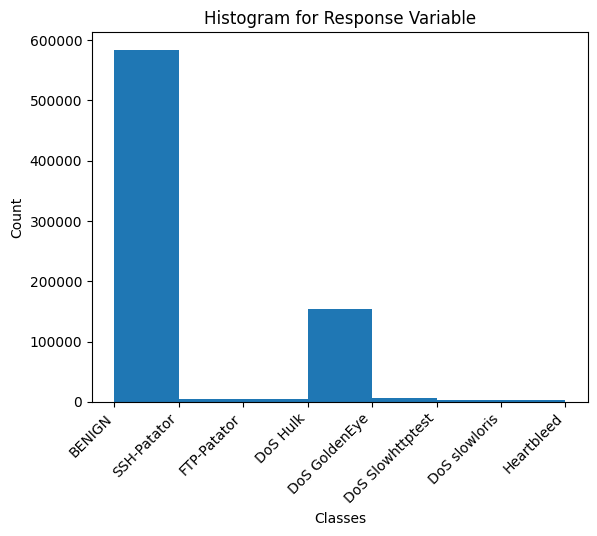

In [ ]:
plt.hist(y, bins=range(0, 8))
plt.xticks(rotation=45, ha='right')
plt.locator_params(axis='x', nbins=5)
# set the plot title and axis labels
plt.title("Histogram for Response Variable")
plt.xlabel("Classes")
plt.ylabel("Count")

The below code is used to create a heatmap of the correlation matrix between variables in a pandas DataFrame using the Seaborn library and the correlation matrix between variables in a pandas DataFrame called df_clean using the corr() method.

<ipython-input-15-b0de6dac9e12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_clean.corr()


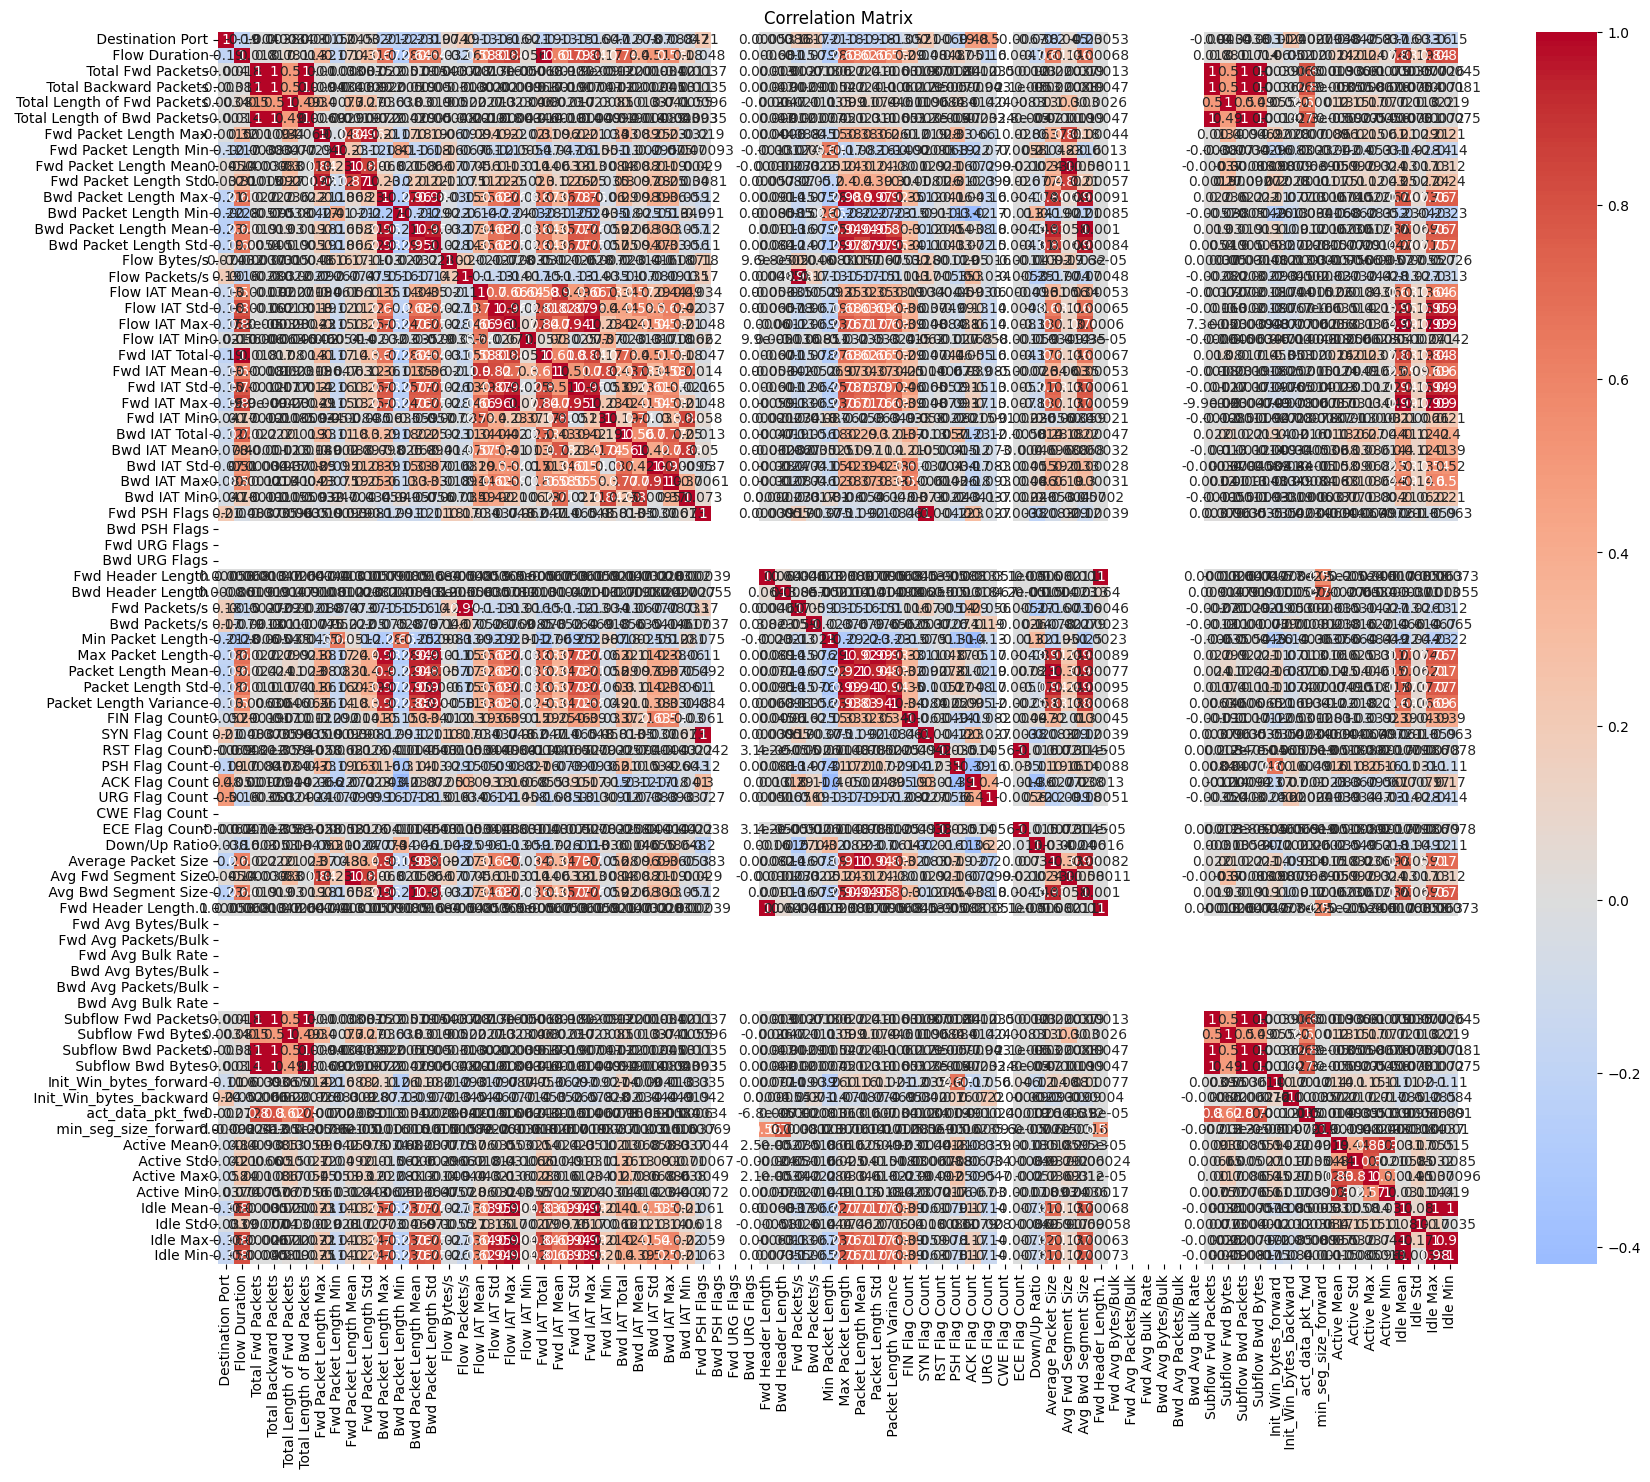

In [ ]:
corr_matrix = df_clean.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

The below code splits the feature matrix X and response variable y into four separate objects: X_train, X_test, y_train, and y_test.

This is done using the train_test_split() function from the scikit-learn library, which randomly splits the data into training and testing sets. The test_size parameter specifies the proportion of the data that should be allocated to the testing set, and is set to 0.1, indicating that 10% of the data should be used for testing. The random_state parameter sets the random seed to ensure that the same split is obtained each time the code is run.

The resulting X_train, X_test, y_train, and y_test objects are used to train and evaluate a machine learning model. X_train and y_train are used to fit the model, while X_test and y_test are used to evaluate the model's performance on new, unseen data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=5)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(n_neighbors=3)
X_train_near, y_train_near = nm.fit_resample(X_train, y_train)

----------------------------Decision Tree ------------------------------
The code creates an instance of the DecisionTreeClassifier() class from scikit-learn and fits it to the training data X_train and y_train.

max_depth is a tunable parameter that determines the maximum depth of the decision tree. Setting it to 10 means that the tree will have at most 10 levels of nodes.

After the model has been trained, the predict() method is used to generate predicted values for the test data X_test. The predicted values are stored in the y_hat variable.

The accuracy of the predictions can then be evaluated using various metrics, such as accuracy score, confusion matrix, ROC curve, and classification report.

In [ ]:
#Create the model
model_DTC = DecisionTreeClassifier(max_depth=10)
#Fit the model (on training data)
model_DTC.fit(X_train, y_train)
#Predict y_hat values for the test data
yhat_DTC = model_DTC.predict(X_test)

In [ ]:
print('---------------Decision Tree-------------\n')
acc_DTC = accuracy_score(y_test, yhat_DTC)
print('Accuracy of Decision Tree:', acc_DTC)
classfication_DTC = classification_report(y_test, yhat_DTC)
print('\nClassification Report:\n', classfication_DTC)

---------------Decision Tree-------------

Accuracy of Decision Tree: 0.9963903655575245

Classification Report:
                   precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00     58392
   DoS GoldenEye       1.00      0.97      0.99       690
        DoS Hulk       1.00      1.00      1.00     15419
DoS Slowhttptest       0.99      0.84      0.91       368
   DoS slowloris       0.99      0.74      0.84       388
     FTP-Patator       1.00      1.00      1.00       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       1.00      0.99      1.00       395

        accuracy                           1.00     76185
       macro avg       1.00      0.94      0.97     76185
    weighted avg       1.00      1.00      1.00     76185



------------------------ Decision Tree Using SMOTE -------------------------

In [ ]:
#Create the model
model_DTC_smote = DecisionTreeClassifier(max_depth=10)
#Fit the model (on training data)
model_DTC_smote.fit(X_train_smote, y_train_smote)
#Predict y_hat values for the test data
yhat_DTC_smote = model_DTC_smote.predict(X_test)

In [ ]:
print('---------------Decision Tree using SMOTE-------------\n')
acc_DTC_smote = accuracy_score(y_test, yhat_DTC_smote)
print('Accuracy: ', acc_DTC_smote)
classfication_DTC_smote = classification_report(y_test, yhat_DTC_smote)
print('\nClassification Report: \n', classfication_DTC_smote)

---------------Decision Tree using SMOTE-------------

Accuracy:  0.9557130668766818

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      0.94      0.97     58392
   DoS GoldenEye       0.99      0.97      0.98       690
        DoS Hulk       0.92      1.00      0.96     15419
DoS Slowhttptest       0.16      0.99      0.27       368
   DoS slowloris       0.78      0.86      0.82       388
     FTP-Patator       1.00      1.00      1.00       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       0.99      1.00      1.00       395

        accuracy                           0.96     76185
       macro avg       0.85      0.97      0.87     76185
    weighted avg       0.98      0.96      0.96     76185



--------------------- Decision Tree using NearMiss -------------------------

In [ ]:
#Create the model
model_DTC_near = DecisionTreeClassifier(max_depth=10)
#Fit the model (on training data)
model_DTC_near.fit(X_train_near, y_train_near)
#Predict y_hat values for the test data
yhat_DTC_near = model_DTC_near.predict(X_test)

In [ ]:
print('---------------Decision Tree using NearMiss-------------\n')
acc_DTC_near = accuracy_score(y_test, yhat_DTC_near)
print('Accuracy: ', acc_DTC_near)
classfication_DTC_near = classification_report(y_test, yhat_DTC_near)
print('\nClassification Report: \n', classfication_DTC_near)

---------------Decision Tree using NearMiss-------------

Accuracy:  0.14704994421474044


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       0.51      0.01      0.02     58392
   DoS GoldenEye       0.00      0.00      0.00       690
        DoS Hulk       0.98      0.62      0.76     15419
DoS Slowhttptest       0.00      0.02      0.01       368
   DoS slowloris       0.01      0.80      0.03       388
     FTP-Patator       0.32      0.49      0.38       532
      Heartbleed       0.00      1.00      0.00         1
     SSH-Patator       0.01      0.99      0.02       395

        accuracy                           0.15     76185
       macro avg       0.23      0.49      0.15     76185
    weighted avg       0.59      0.15      0.17     76185



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------- Random Forest -------------------------
This code creates an instance of the RandomForestClassifier() class from scikit-learn with maximum number of trees = 100, random_state=42 and fits it to the training data X_train and y_train. Then predicts the y_hat values of X_test

In [ ]:
# Initialize the Random Forest Classifier
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier using the training data
model_RF.fit(X_train, y_train)

# Predict the class labels for the test data
yhat_RF = model_RF.predict(X_test)

In [ ]:
print('---------------Random Forest-------------\n')
acc_RF = accuracy_score(y_test, yhat_RF)
print('Accuracy: ', acc_RF)
classfication_RF = classification_report(y_test, yhat_RF)
print('\nClassification Report: \n', classfication_RF)

---------------Random Forest-------------

Accuracy:  0.9995274660366213

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00     58392
   DoS GoldenEye       1.00      1.00      1.00       690
        DoS Hulk       1.00      1.00      1.00     15419
DoS Slowhttptest       0.99      1.00      1.00       368
   DoS slowloris       1.00      0.99      0.99       388
     FTP-Patator       1.00      1.00      1.00       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       1.00      1.00      1.00       395

        accuracy                           1.00     76185
       macro avg       1.00      1.00      1.00     76185
    weighted avg       1.00      1.00      1.00     76185



-------------------------- Random Forest using SMOTE ---------------------------

In [ ]:
# Initialize the Random Forest Classifier
model_RF_smote = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier using the training data
model_RF_smote.fit(X_train_smote, y_train_smote)

# Predict the class labels for the test data
yhat_RF_smote = model_RF_smote.predict(X_test)

In [ ]:
print('---------------Random Forest using SMOTE-------------\n')
acc_RF_smote = accuracy_score(y_test, yhat_RF_smote)
print('Accuracy: ', acc_RF_smote)
classfication_RF_smote = classification_report(y_test, yhat_RF_smote)
print('\nClassification Report: \n', classfication_RF_smote)

---------------Random Forest using SMOTE-------------

Accuracy:  0.9994749622629127

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00     58392
   DoS GoldenEye       0.99      1.00      1.00       690
        DoS Hulk       1.00      1.00      1.00     15419
DoS Slowhttptest       0.98      0.99      0.99       368
   DoS slowloris       0.99      0.98      0.99       388
     FTP-Patator       1.00      1.00      1.00       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       1.00      1.00      1.00       395

        accuracy                           1.00     76185
       macro avg       1.00      1.00      1.00     76185
    weighted avg       1.00      1.00      1.00     76185



---------------------- Random Forest using NearMiss ------------------------

In [ ]:
# Initialize the Random Forest Classifier
model_RF_near = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier using the training data
model_RF_near.fit(X_train_near, y_train_near)

# Predict the class labels for the test data
yhat_RF_near = model_RF_near.predict(X_test)

In [ ]:
print('---------------Random Forest using NearMiss-------------\n')
acc_RF_near = accuracy_score(y_test, yhat_RF_near)
print('Accuracy: ', acc_RF_near)
classfication_RF_near = classification_report(y_test, yhat_RF_near)
print('\nClassification Report: \n', classfication_RF_near)

---------------Random Forest using NearMiss-------------

Accuracy:  0.1684321060576229

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       0.99      0.03      0.05     58392
   DoS GoldenEye       0.01      0.02      0.01       690
        DoS Hulk       0.65      0.68      0.66     15419
DoS Slowhttptest       0.01      0.04      0.02       368
   DoS slowloris       0.19      0.30      0.24       388
     FTP-Patator       0.01      1.00      0.02       532
      Heartbleed       0.04      1.00      0.08         1
     SSH-Patator       0.05      0.51      0.09       395

        accuracy                           0.17     76185
       macro avg       0.24      0.45      0.15     76185
    weighted avg       0.89      0.17      0.17     76185



-------------------- Bagging Classifier -----------------------
This code implements BaggingClassifier() of DecisionTreeClassifier() class from scikit-learn and fits it to the training data X_train and y_train. Then predicts the y_hat values of X_test

In [ ]:
# Define base estimator
base_estimator = DecisionTreeClassifier()

# Define bagging classifier
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging.fit(X_train, y_train)

# Predict on test data
yhat_bagging = bagging.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print('---------------Bagging-------------\n')
acc_bagging = accuracy_score(y_test, yhat_bagging)
print('Accuracy: ', acc_RF)
classfication_bagging = classification_report(y_test, yhat_bagging)
print('\nClassification Report: \n', classfication_bagging)

---------------Bagging-------------

Accuracy:  0.9995274660366213

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00     58392
   DoS GoldenEye       1.00      1.00      1.00       690
        DoS Hulk       1.00      1.00      1.00     15419
DoS Slowhttptest       0.99      0.99      0.99       368
   DoS slowloris       0.99      0.99      0.99       388
     FTP-Patator       1.00      1.00      1.00       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       1.00      1.00      1.00       395

        accuracy                           1.00     76185
       macro avg       1.00      1.00      1.00     76185
    weighted avg       1.00      1.00      1.00     76185



------------------ Bagging Classifier using SMOTE -----------------------

In [ ]:
# Define bagging classifier
bagging_smote = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_smote.fit(X_train_smote, y_train_smote)

# Predict on test data
yhat_bagging_smote = bagging_smote.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print('---------------Bagging using SMOTE-------------\n')
acc_bagging_smote = accuracy_score(y_test, yhat_bagging_smote)
print('Accuracy: ', acc_bagging_smote)
classfication_bagging_smote = classification_report(y_test, yhat_bagging_smote)
print('\nClassification Report: \n', classfication_bagging_smote)

---------------Bagging using SMOTE-------------

Accuracy:  0.9993174509417865

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00     58392
   DoS GoldenEye       0.99      1.00      0.99       690
        DoS Hulk       1.00      1.00      1.00     15419
DoS Slowhttptest       0.95      0.99      0.97       368
   DoS slowloris       0.99      0.97      0.98       388
     FTP-Patator       1.00      1.00      1.00       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       1.00      1.00      1.00       395

        accuracy                           1.00     76185
       macro avg       0.99      0.99      0.99     76185
    weighted avg       1.00      1.00      1.00     76185



------------------- Baggigng Classifier using NearMiss ------------------------

In [ ]:
# Define bagging classifier
bagging_near = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_near.fit(X_train, y_train)

# Predict on test data
yhat_bagging_near = bagging_near.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print('---------------Bagging using NearMiss-------------\n')
acc_bagging_near = accuracy_score(y_test, yhat_bagging_near)
print('Accuracy: ', acc_bagging_near)
classfication_bagging_near = classification_report(y_test, yhat_bagging_near)
print('\nClassification Report: \n', classfication_bagging_near)

---------------Bagging using NearMiss-------------

Accuracy:  0.9996587254708932

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00     58392
   DoS GoldenEye       1.00      1.00      1.00       690
        DoS Hulk       1.00      1.00      1.00     15419
DoS Slowhttptest       0.99      0.99      0.99       368
   DoS slowloris       0.99      0.99      0.99       388
     FTP-Patator       1.00      1.00      1.00       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       1.00      1.00      1.00       395

        accuracy                           1.00     76185
       macro avg       1.00      1.00      1.00     76185
    weighted avg       1.00      1.00      1.00     76185



--------------------- AdaBoost Classifier -----------------------

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base classifier
base_estimator = DecisionTreeClassifier(max_depth=3)

# Define the AdaBoost classifier with 50 estimators
boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

# Fit the model on the training data
boost.fit(X_train, y_train)

# Make predictions on the test data
yhat_boost = boost.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print('---------------AdaBoost-------------\n')
acc_boost = accuracy_score(y_test, yhat_boost)
print('Accuracy: ', acc_boost)
classfication_boost = classification_report(y_test, yhat_boost)
print('\nClassification Report: \n', classfication_boost)

---------------AdaBoost-------------

Accuracy:  0.8560084006037934

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       0.98      0.83      0.90     58392
   DoS GoldenEye       1.00      0.97      0.98       690
        DoS Hulk       0.61      0.96      0.74     15419
DoS Slowhttptest       0.91      0.71      0.80       368
   DoS slowloris       0.51      0.62      0.56       388
     FTP-Patator       1.00      1.00      1.00       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       0.99      0.45      0.62       395

        accuracy                           0.86     76185
       macro avg       0.87      0.82      0.82     76185
    weighted avg       0.90      0.86      0.87     76185



--------------------- AdaBoost Classifier using SMOTE -----------------------

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base classifier
base_estimator = DecisionTreeClassifier(max_depth=3)


In [ ]:
# Define the AdaBoost classifier with 50 estimators
boost_smote = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

# Fit the model on the training data
boost_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
yhat_boost_smote = boost_smote.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print('---------------AdaBoost using SMOTE-------------\n')
acc_boost_smote = accuracy_score(y_test, yhat_boost_smote)
print('Accuracy: ', acc_boost_smote)
classfication_boost_smote = classification_report(y_test, yhat_boost_smote)
print('\nClassification Report: \n', classfication_boost_smote)

---------------AdaBoost using SMOTE-------------

Accuracy:  0.9688258843604384

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       0.99      0.97      0.98     58392
   DoS GoldenEye       0.83      0.93      0.88       690
        DoS Hulk       0.95      0.98      0.97     15419
DoS Slowhttptest       0.43      0.46      0.44       368
   DoS slowloris       0.30      0.61      0.41       388
     FTP-Patator       1.00      1.00      1.00       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       0.99      0.52      0.68       395

        accuracy                           0.97     76185
       macro avg       0.81      0.81      0.79     76185
    weighted avg       0.97      0.97      0.97     76185



--------------------- AdaBoost Classifier usnig NearMiss -----------------------

In [ ]:
# Define the AdaBoost classifier with 50 estimators
boost_near = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

# Fit the model on the training data
boost_near.fit(X_train_near, y_train_near)

# Make predictions on the test data
yhat_boost_near = boost_near.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print('---------------AdaBoost using NearMiss-------------\n')
acc_boost_near = accuracy_score(y_test, yhat_boost_near)
print('Accuracy: ', acc_boost_near)
classfication_boost_near = classification_report(y_test, yhat_boost_near)
print('\nClassification Report: \n', classfication_boost_near)

---------------AdaBoost using NearMiss-------------

Accuracy:  0.15865327820437095

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      0.03      0.05     58392
   DoS GoldenEye       0.00      0.00      0.00       690
        DoS Hulk       0.79      0.62      0.69     15419
DoS Slowhttptest       0.01      0.15      0.02       368
   DoS slowloris       0.07      0.33      0.11       388
     FTP-Patator       0.01      1.00      0.02       532
      Heartbleed       0.03      1.00      0.05         1
     SSH-Patator       0.03      0.51      0.06       395

        accuracy                           0.16     76185
       macro avg       0.24      0.46      0.13     76185
    weighted avg       0.93      0.16      0.18     76185



------------------ KNN Classifier -------------------

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
KNN = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
KNN.fit(X_train, y_train)

# Predict the labels of the test data
yhat_KNN = KNN.predict(X_test)

print("------------KNN Classifier ----------------\n\n")

acc_KNN = accuracy_score(y_test, yhat_KNN)
print('Accuracy: ', acc_KNN)
classfication_KNN = classification_report(y_test, yhat_KNN)
print('\nClassification Report: \n', classfication_KNN)

------------KNN Classifier ----------------


Accuracy:  0.995497801404476

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00     58392
   DoS GoldenEye       0.99      0.98      0.98       690
        DoS Hulk       0.99      1.00      0.99     15419
DoS Slowhttptest       0.94      0.96      0.95       368
   DoS slowloris       0.98      0.96      0.97       388
     FTP-Patator       0.99      0.99      0.99       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       0.95      0.98      0.97       395

        accuracy                           1.00     76185
       macro avg       0.98      0.98      0.98     76185
    weighted avg       1.00      1.00      1.00     76185



------------------ KNN Classifier using SMOTE -------------------

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
KNN_smote = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
KNN_smote.fit(X_train_smote, y_train_smote)

# Predict the labels of the test data
yhat_KNN_smote = KNN_smote.predict(X_test)

print("------------KNN Classifier using SMOTE ----------------\n\n")

acc_KNN_smote = accuracy_score(y_test, yhat_KNN_smote)
print('Accuracy: ', acc_KNN_smote)
classfication_KNN_smote = classification_report(y_test, yhat_KNN_smote)
print('\nClassification Report: \n', classfication_KNN_smote)

------------KNN Classifier using SMOTE ----------------


Accuracy:  0.9934895320601168

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      0.99      1.00     58392
   DoS GoldenEye       0.93      1.00      0.96       690
        DoS Hulk       0.99      1.00      0.99     15419
DoS Slowhttptest       0.83      1.00      0.91       368
   DoS slowloris       0.90      0.97      0.94       388
     FTP-Patator       0.97      0.99      0.98       532
      Heartbleed       0.25      1.00      0.40         1
     SSH-Patator       0.86      0.99      0.92       395

        accuracy                           0.99     76185
       macro avg       0.84      0.99      0.89     76185
    weighted avg       0.99      0.99      0.99     76185



------------------ KNN Classifier using NearMiss -------------------

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
KNN_near = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
KNN_near.fit(X_train_near, y_train_near)

# Predict the labels of the test data
yhat_KNN_near = KNN_near.predict(X_test)

print("------------KNN Classifier using Near----------------\n\n")

acc_KNN_near = accuracy_score(y_test, yhat_KNN_near)
print('Accuracy: ', acc_KNN_near)
classfication_KNN_near = classification_report(y_test, yhat_KNN_near)
print('\nClassification Report: \n', classfication_KNN_near)

------------KNN Classifier using Near----------------


Accuracy:  0.12845048237842094

Classification Report: 
                   precision    recall  f1-score   support

          BENIGN       1.00      0.05      0.09     58392
   DoS GoldenEye       0.00      0.01      0.00       690
        DoS Hulk       0.90      0.42      0.57     15419
DoS Slowhttptest       0.06      0.23      0.10       368
   DoS slowloris       0.01      0.01      0.01       388
     FTP-Patator       0.01      1.00      0.02       532
      Heartbleed       1.00      1.00      1.00         1
     SSH-Patator       0.01      0.02      0.01       395

        accuracy                           0.13     76185
       macro avg       0.37      0.34      0.23     76185
    weighted avg       0.95      0.13      0.18     76185



------------------ Convolutional neural networks (CNNs) ---------------------

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
model = Sequential()
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


#Reshape data for CNN model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate model on testing/validation data
print("------------ Convolutional neural networks (CNNs) ----------------\n\n")
test_loss, acc_CNN = model.evaluate(X_test, y_test, verbose=0)
print('Testing Accuracy:', acc_CNN)
yhat_CNN = model.predict(X_test)
print('Testing Classification Report:\n', classification_report(y_test, yhat_CNN))

yhat_CNN = model.predict(X_test)

Epoch 1/10
5357/5357 [==============================] - 106s 19ms/step - loss: -5305287485423616.0000 - accuracy: 0.0273 - val_loss: -22528477857054720.0000 - val_accuracy: 0.0238
Epoch 2/10
5357/5357 [==============================] - 102s 19ms/step - loss: -91332144541990912.0000 - accuracy: 0.0237 - val_loss: -201306525912793088.0000 - val_accuracy: 0.0233
Epoch 3/10
5357/5357 [==============================] - 95s 18ms/step - loss: -431690186577936384.0000 - accuracy: 0.0234 - val_loss: -741959929711034368.0000 - val_accuracy: 0.0229
Epoch 4/10
5357/5357 [==============================] - 96s 18ms/step - loss: -1268265771918688256.0000 - accuracy: 0.0230 - val_loss: -1918189156681383936.0000 - val_accuracy: 0.0227
Epoch 5/10
5357/5357 [==============================] - 95s 18ms/step - loss: -2897885765428051968.0000 - accuracy: 0.0229 - val_loss: -4060238880777961472.0000 - val_accuracy: 0.0228
Epoch 6/10
5357/5357 [==============================] - 97s 18ms/step - loss: -570007883

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2381/2381 [==============================] - 6s 2ms/step


The classification_report() function from scikit-learn is used to generate a report of various classification metrics for the predicted labels y_hat and the actual labels y_test.

The classification_report() function is commonly used to evaluate the performance of a classification model. It provides a quick overview of how well the model is performing on each class, as well as an overall summary of its performance.

The accuracy_score() function is part of the scikit-learn library in Python and returns the percentage of correctly classified samples.

accuracy_score(y_test, y_hat) calculates the accuracy score of a classification model by comparing the predicted labels (y_hat) with the true labels (y_test).

The resulting acc variable contains a floating point number between 0 and 1 that represents the accuracy of the model. A score of 1.0 indicates that the model predicted all labels correctly, while a score of 0.0 indicates that the model predicted all labels incorrectly.

The code belows gives the plot for the comparison of the all three models classification report.

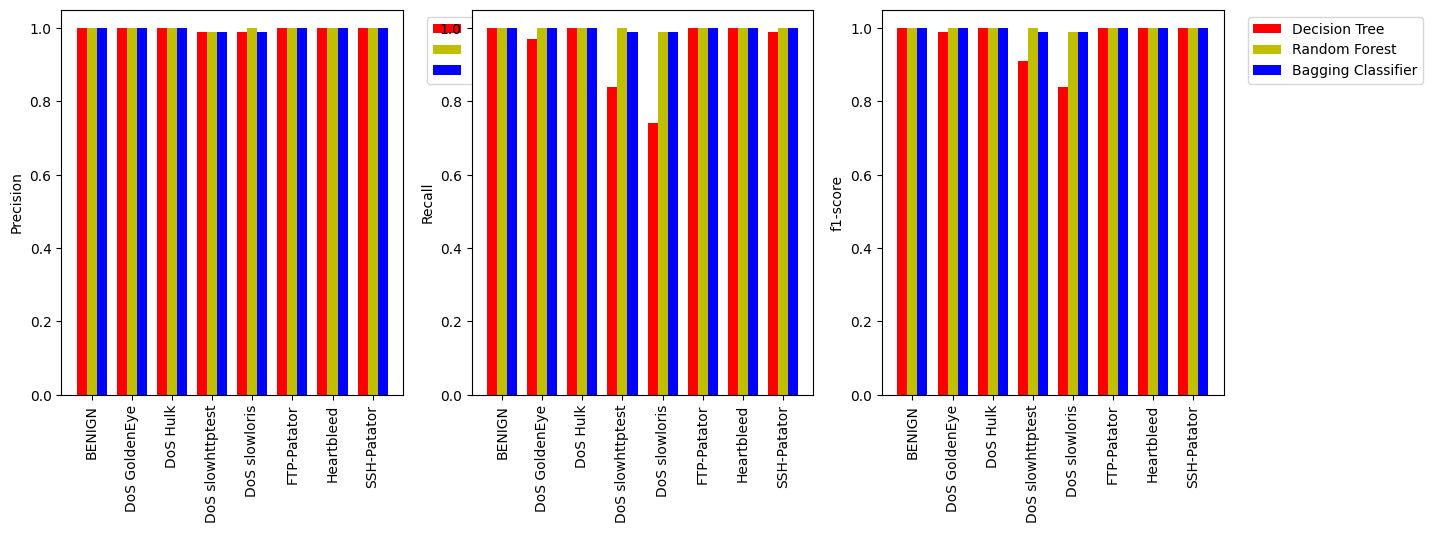

In [ ]:
# Define class names
class_names = ['BENIGN', 'DoS GoldenEye', 'DoS Hulk', 'DoS slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'SSH-Patator']

# Define precision, recall, and f1-score for each class
dt_metrics = np.array([[1.00, 1.00, 1.00], [1.00, 0.97, 0.99], [1.00, 1.00, 1.00], [0.99, 0.84, 0.91], [0.99, 0.74, 0.84], [1.00, 1.00, 1.00], [1.00, 1.00, 1.00], [1.00, 0.99, 1.00]])
rf_metrics = np.array([[1.00, 1.00, 1.00], [1.00, 1.00, 1.00], [1.00, 1.00, 1.00], [0.99, 1.00, 1.00], [1.00, 0.99, 0.99], [1.00, 1.00, 1.00], [1.00, 1.00, 1.00], [1.00, 1.00, 1.00]])
bc_metrics = np.array([[1.00, 1.00, 1.00], [1.00, 1.00, 1.00], [1.00, 1.00, 1.00], [0.99, 0.99, 0.99], [0.99, 0.99, 0.99], [1.00, 1.00, 1.00], [1.00, 1.00, 1.00], [1.00, 1.00, 1.00]])

# Create subplots for each metric
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Plot precision scores for each classifier
ind = np.arange(len(class_names))
width = 0.25
rects1 = ax1.bar(ind, dt_metrics[:,0], width, color='r')
rects2 = ax1.bar(ind + width, rf_metrics[:,0], width, color='y')
rects3 = ax1.bar(ind + width*2, bc_metrics[:,0], width, color='b')
ax1.set_ylabel('Precision')
ax1.set_xticks(ind + width)
ax1.set_xticklabels(class_names, rotation=90)
ax1.legend((rects1[0], rects2[0], rects3[0]), ('Decision Tree', 'Random Forest', 'Bagging Classifier'), bbox_to_anchor=(1.05, 1))


# Plot recall scores for each classifier
rects1 = ax2.bar(ind, dt_metrics[:,1], width, color='r')
rects2 = ax2.bar(ind + width, rf_metrics[:,1], width, color='y')
rects3 = ax2.bar(ind + width*2, bc_metrics[:,1], width, color='b')
ax2.set_ylabel('Recall')
ax2.set_xticks(ind + width)
ax2.set_xticklabels(class_names, rotation=90)
ax1.legend((rects1[0], rects2[0], rects3[0]), ('Decision Tree', 'Random Forest', 'Bagging Classifier'), bbox_to_anchor=(1.05, 1))


# plot bar chart for f1-score
rects1 = ax3.bar(ind, dt_metrics[:,2], width, color='r')
rects2 = ax3.bar(ind + width, rf_metrics[:,1], width, color='y')
rects3 = ax3.bar(ind + width*2, bc_metrics[:,1], width, color='b')
ax3.set_ylabel('f1-score')
ax3.set_xticks(ind + width)
ax3.set_xticklabels(class_names, rotation=90)
ax3.legend((rects1[0], rects2[0], rects3[0]), ('Decision Tree', 'Random Forest', 'Bagging Classifier'), bbox_to_anchor=(1.05, 1))


The code reads a CSV file called "Cyberattack_Detection_Test.csv" using the Pandas library and assigns the resulting DataFrame object to a variable called Test_csv.

read_csv is a method in Pandas that allows you to read a CSV file into a DataFrame. The method takes the file path or URL of the CSV file as the input parameter, and returns a DataFrame object containing the data from the CSV file.

In [ ]:
Test_csv=pd.read_csv('/content/drive/MyDrive/Cyberattack_Detection_Test_perturbed_X.csv')
df3=pd.DataFrame(Test_csv)

df3.mean() function is used to the calculate the mean values of all the columns and stores in the 'mean_values' variable. Then replaced the positive and negative infinities with 'NAN' value and then replaced the 'NAN' values with mean values and still existed positive and negative infinities with '1e10'and '-1e10'.

In [ ]:
print(np.any(np.isinf(df3)))
print(np.any(np.isnan(df3)))

False
False


We are using the RandomForestClassifier model to train the data, because the classification report of this model is better than other two models. 
So we are using RandomForesrClassifier model.
Then uses predict() method is used to generate predicted values for the test data. The predicted values are stored in the y_test_hat variable.


In [ ]:
test_data=df3
y_test_hat= KNN_smote.predict(test_data)
print(y_test_hat)


['DoS Hulk' 'DoS Hulk' 'DoS GoldenEye' ... 'BENIGN' 'SSH-Patator' 'BENIGN']


The DataFrame() function from pandas library creates a new DataFrame object called y_test_hat from an existing Tuple object .


In [ ]:
y_test_hat = pd.DataFrame(y_test_hat)
print(y_test_hat)


                   0
0           DoS Hulk
1           DoS Hulk
2      DoS GoldenEye
3             BENIGN
4             BENIGN
...              ...
20533         BENIGN
20534         BENIGN
20535         BENIGN
20536    SSH-Patator
20537         BENIGN

[20538 rows x 1 columns]


The below code creates csv file 'Y_hat.csv' using pandas library and then stores the dataframe object 'y_test_hat'

In [ ]:
y_test_hat.to_csv('Y_hat_KNN_smote.csv',index=False)